In [11]:
#Normal GD
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad(x):
    return 2*x

x = 5
learning_rate = 0.1
points = []

for _ in range(20):
    points.append(x)
    x -= learning_rate * grad(x)

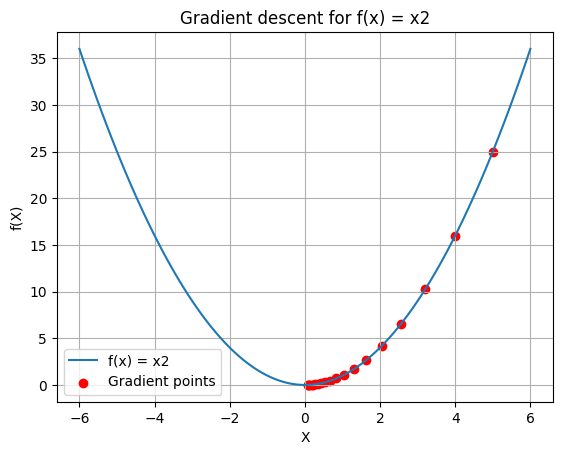

In [12]:
x_vals = np.linspace(-6,6,100)
plt.plot(x_vals,f(x_vals),label = 'f(x) = x2')
plt.scatter(points,[f(p) for p in points],color = 'red', label = 'Gradient points')
plt.title("Gradient descent for f(x) = x2")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#RMS Prop Optimization
x = 5
epsilon = 1e-8
decay_rate = 0.9
cache = 0
learning_rate = 0.1
points = []

for _ in range(20):
    points.append(x)
    g = grad(x)
    cache = decay_rate * cache + (1-decay_rate) * g**2
    x -= learning_rate * g/(np.sqrt(cache) + epsilon)

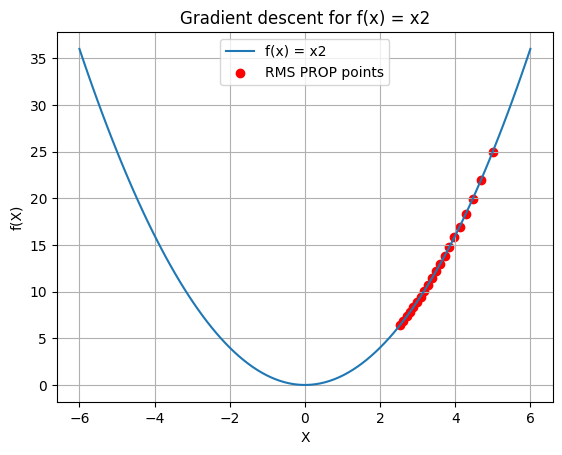

In [15]:
x_vals = np.linspace(-6,6,100)
plt.plot(x_vals,f(x_vals),label = 'f(x) = x2')
plt.scatter(points,[f(p) for p in points],color = 'red', label = 'RMS PROP points')
plt.title("Gradient descent for f(x) = x2")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()
plt.grid(True)
plt.show()

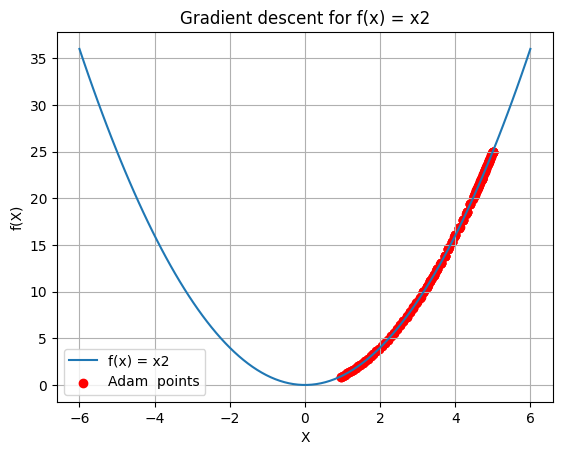

In [20]:
#ADAM
x = 5
alpha = 0.1       # learning rate
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

m = 0  # first moment
v = 0  # second moment
t = 0  # time step

for _ in range(50):
    points.append(x)
    g = grad(x)
    t+=1

    m = beta1*m + (1-beta1)*g
    v = beta2*v + (1-beta2)*g**2

    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)

    x -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)

x_vals = np.linspace(-6,6,100)
plt.plot(x_vals,f(x_vals),label = 'f(x) = x2')
plt.scatter(points,[f(p) for p in points],color = 'red', label = 'Adam  points')
plt.title("Gradient descent for f(x) = x2")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

y = y.reshape(-1,1)

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_pred,y_true):
    epsilon  = 1e-8
    y_pred = np.clip(y_pred,epsilon,1-epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log((1-y_pred)))

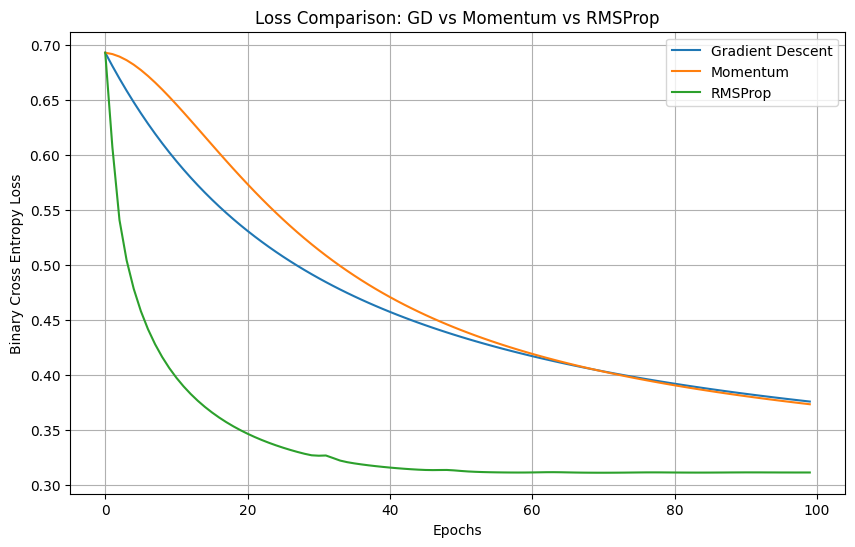

In [56]:
def train_classifier(optimizer = 'gd',lr = 0.1,epochs = 100,beta = 0.9):
    w = np.zeros((X_train.shape[1],1))
    b = 0
    loss_history = []

    v_w = np.zeros_like(w)
    v_b = 0
    s_w = np.zeros_like(w)
    s_b = 0

    for epoch in range(epochs):
        z = X_train @ w + b
        y_pred = sigmoid(z)

        loss = binary_cross_entropy(y_pred,y_train)
        loss_history.append(loss)

        dw = X_train.T @ (y_pred - y_train) / len(y_train)
        db = np.mean(y_pred - y_train)

        if optimizer == 'gd':
            w -= lr * dw
            b -= lr * db
        elif optimizer == 'momentum':
            v_w = beta * v_w + (1 - beta) * dw
            v_b = beta * v_b + (1 - beta) * db
            w -= lr * v_w
            b -= lr * v_b
        elif optimizer == 'rmsprop':
            s_w = beta * s_w + (1 - beta) * (dw ** 2)
            s_b = beta * s_b + (1 - beta) * (db ** 2)
            w -= lr * dw / (np.sqrt(s_w) + 1e-8)
            b -= lr * db / (np.sqrt(s_b) + 1e-8)

    return loss_history

loss_gd = train_classifier('gd', lr=0.1)
loss_momentum = train_classifier('momentum', lr=0.1, beta=0.9)
loss_rmsprop = train_classifier('rmsprop', lr=0.1, beta=0.9) 

plt.figure(figsize=(10, 6))
plt.plot(loss_gd, label="Gradient Descent")
plt.plot(loss_momentum, label="Momentum")
plt.plot(loss_rmsprop, label="RMSProp")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Loss Comparison: GD vs Momentum vs RMSProp")
plt.legend()
plt.grid(True)
plt.show()